Forma original de X: (14700, 250)
Forma original de Y: (1, 250)
CE_x shape: (200, 14700)
CE_y shape: (200,)
CV_x shape: (50, 14700)
CV_y shape: (50,)
Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 6s/step - auc: 0.5484 - loss: 31.3620 - val_auc: 0.5000 - val_loss: 36.0650
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - auc: 0.5314 - loss: 33.3174 - val_auc: 0.5000 - val_loss: 30.4109
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - auc: 0.4958 - loss: 30.1899 - val_auc: 0.4542 - val_loss: 26.9579
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - auc: 0.5125 - loss: 27.6385 - val_auc: 0.9117 - val_loss: 25.3154
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - auc: 0.6309 - loss: 25.8154 - val_auc: 0.5654 - val_loss: 23.7520
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - auc: 0.6224 - loss: 24.3058 - val_auc: 0.5229 - val_loss: 22.7827
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - auc: 0.4723 - loss: 23.4472 - val_auc: 0.8930 - val_loss: 21.3694
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - auc: 0.5136 - loss: 22.1253 - val_auc: 0.8438 - val_loss: 20.2368
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - auc: 0.5543 - loss

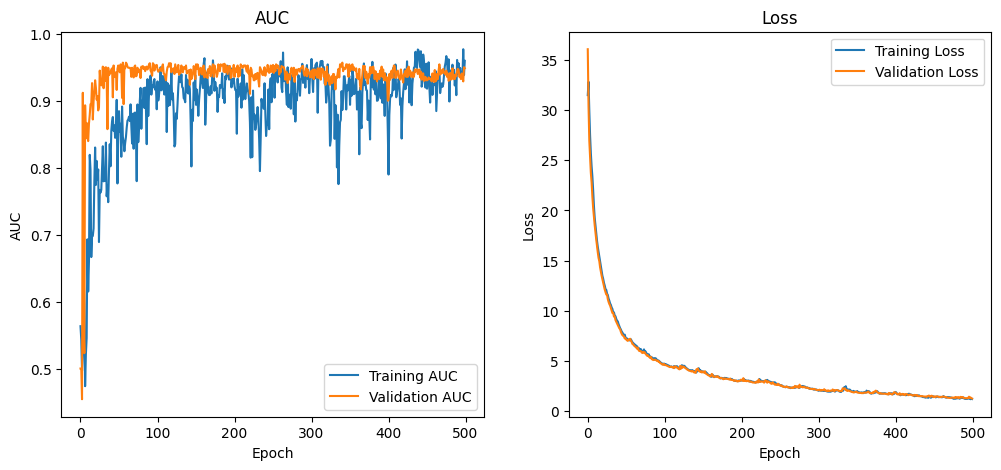

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - auc: 0.9534 - loss: 1.2745
Loss en validación: 1.2702540159225464
AUC en validación: 0.9482173323631287


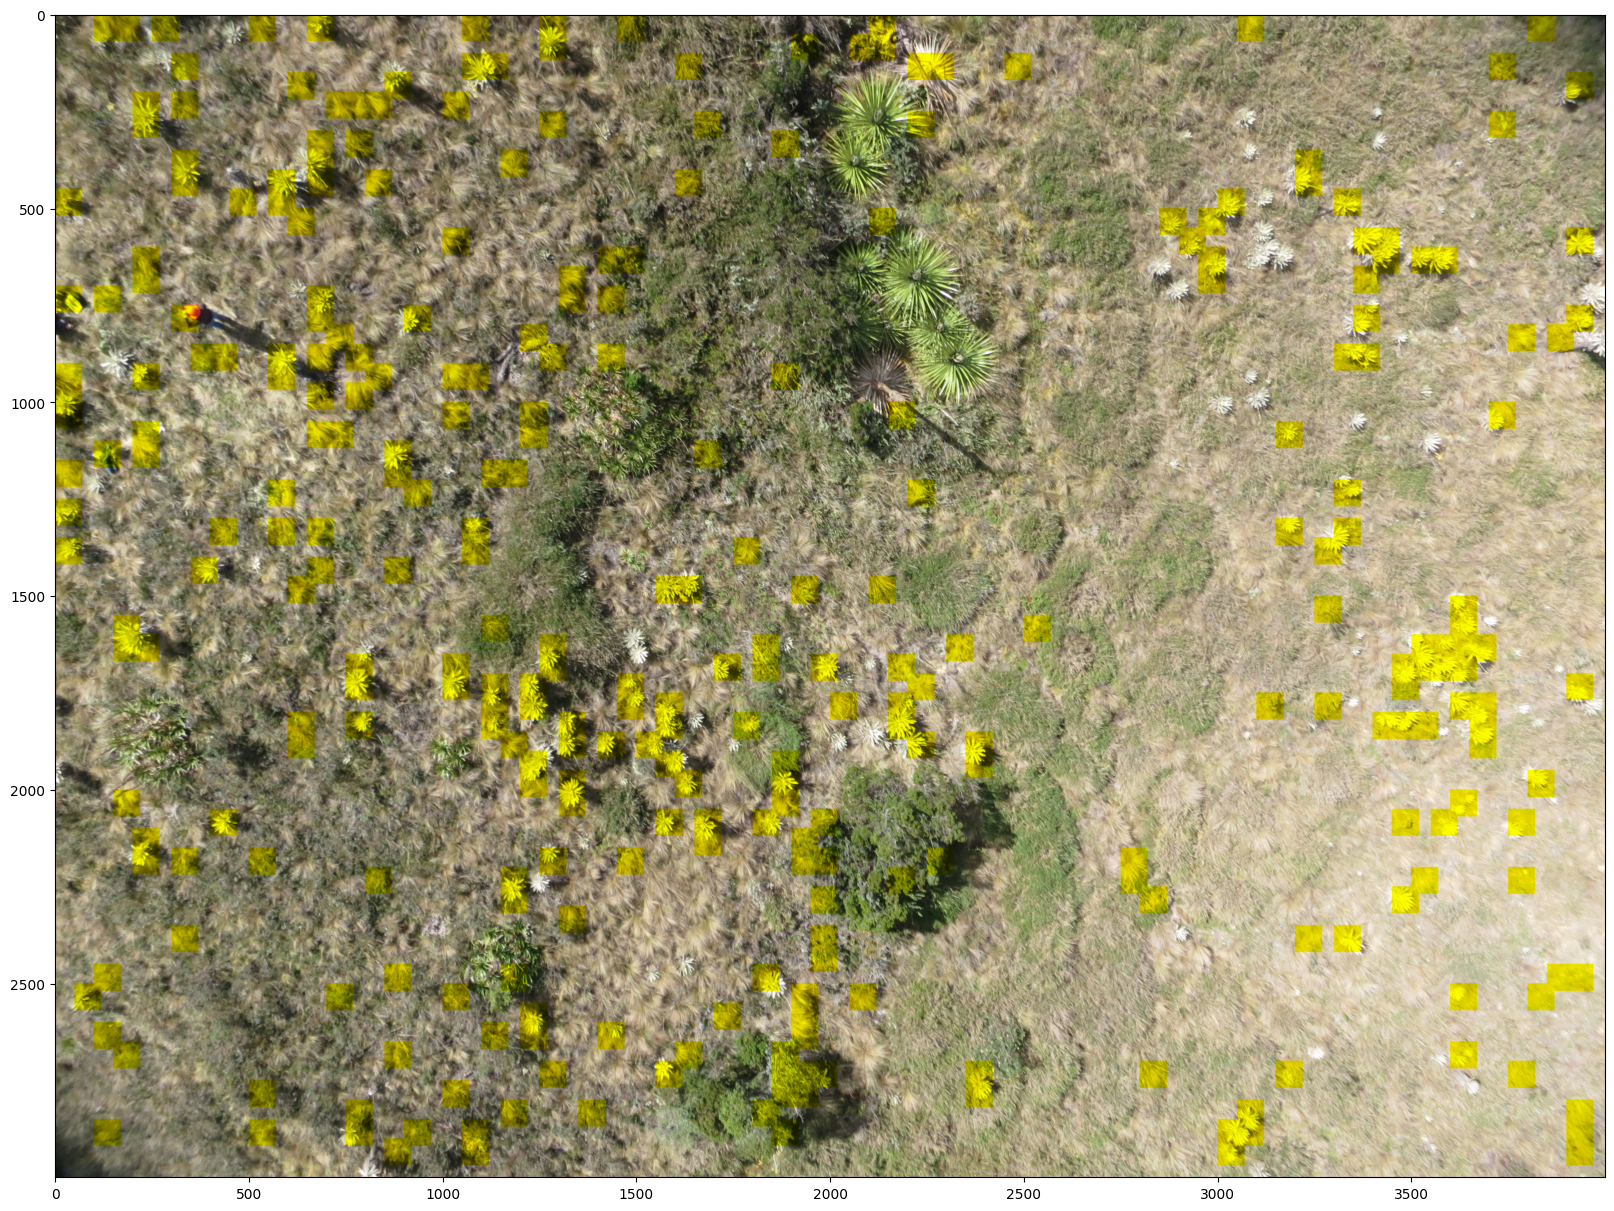

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import urllib.request
import warnings
from tensorflow.keras.layers import Dense, Flatten, Dropout
import random
from tensorflow.keras.regularizers import l1_l2
#from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline
random.seed(42)
# Cargar imagen de prueba
urllib.request.urlretrieve('https://github.com/sergiomora03/AdvancedTopicsAnalytics/blob/main/notebooks/img/IMG_3451.JPG?raw=true', 'IMG_3451.JPG')
img = load_img('IMG_3451.JPG')

# Descargar e importar el script para cargar imágenes
urllib.request.urlretrieve('https://raw.githubusercontent.com/sergiomora03/AdvancedTopicsAnalytics/main/notebooks/img/ImportImagenesURL.py', 'ImportImagenes.py')
from ImportImagenes import import_imagenes

# Cargar imágenes de entrenamiento y prueba
X, Y = import_imagenes()
print("Forma original de X:", X.shape)  # (14700, 250)
print("Forma original de Y:", Y.shape)  # (1, 250)
Y = Y.reshape(-1)

# Dividir los datos en conjuntos de entrenamiento y validación
CE_x, CV_x, CE_y, CV_y = train_test_split(X.T, Y, test_size=0.2, random_state=100)
print("CE_x shape:", CE_x.shape)
print("CE_y shape:", CE_y.shape)
print("CV_x shape:", CV_x.shape)
print("CV_y shape:", CV_y.shape)

# Definir red neuronal
def modelo_red_multicapa(CE_x, CE_y, CV_x, CV_y, n_h1, n_h2, num_iter, tasa, dropout_rate, batch_size, semilla, print_c):
    #np.random.seed(semilla)
    #tf.random.set_seed(semilla)

    model = Sequential()
    model.add(Flatten(input_shape=CE_x.shape[1:]))  # Capa de entrada aplanando la imagen

    # Capa oculta 1
    model.add(Dense(units=n_h1, activation='relu',kernel_initializer='he_normal',  kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))  # Primera capa oculta

    model.add(Dropout(dropout_rate))  # Regularización

    # Capa oculta 2
    model.add(Dense(units=n_h2, activation='relu' ,kernel_initializer='he_normal', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))  # Segunda capa oculta
    #model.add(BatchNormalization())
    #model.add(Dense(units=n_h1, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(dropout_rate))  # Regularización



    # Capa de salida
    model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=tasa), loss='binary_crossentropy', metrics=['auc'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6, verbose=1)


    history = model.fit(CE_x, CE_y, validation_data=(CV_x, CV_y), batch_size=batch_size, epochs=num_iter, verbose=1 if print_c else 0, callbacks=[early_stopping])

    param = model.get_weights()
    epoc = np.argmin(history.history['val_loss']) + 1  # Mejor época basada en validación
    return model, param, epoc, history
#{'n_h1': 350, 'n_h2': 144, 'n_h3': 71, 'dropout_rate': 0.3611268326692357, 'learning_rate': 0.00494694292002401, 'batch_size': 511, 'num_epochs': 288}
#Mejor AUC: 0.9033430218696594
# Entrenar el modelo multicapa con los hiperparámetros
model, param, epoc, history = modelo_red_multicapa(
    CE_x, CE_y, CV_x, CV_y,
    n_h1=159,  # Número de neuronas en la primera capa oculta
    n_h2=457,   # Número de neuronas en la segunda capa oculta
 # Número de neuronas en la tercera capa oculta (opcional)
    num_iter=500,#934,  # Número de épocas
    tasa=0.0007375043276204938,  # Tasa de aprendizaje
    dropout_rate=0.3166866137483689,  # Tasa de dropout
    batch_size=130,  # Tamaño de batch
    semilla=42,
    print_c=True
)
print("Mejor época:", epoc)

# Graficar métricas del modelo
plt.figure(figsize=(12, 5))

# Gráfico de AUC
plt.subplot(1, 2, 1)
plt.plot(history.history['auc'], label='Training AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

# Gráfico de Pérdida (Loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluación del modelo en conjunto de validación
loss, auc = model.evaluate(CV_x, CV_y)
print(f"Loss en validación: {loss}")
print(f"AUC en validación: {auc}")

# Función para realizar la predicción usando los parámetros del modelo multicapa
def pred_multicapa(param, vec, num_layers):
    activations = vec
    weights_biases = iter(param)

    # Asegúrate de que las activaciones tengan la forma correcta (n_entradas, 1)
    activations = activations.reshape(-1, 1)

    # Cálculo de la propagación hacia adelante para las capas ocultas
    for i in range(num_layers):
        W = next(weights_biases)  # Pesos de la capa actual
        b = next(weights_biases)  # Sesgos de la capa actual
        b = b.reshape(-1, 1)
        # Multiplicación de pesos y suma de sesgo
        Z = np.dot(W.T, activations) + b
        activations = np.maximum(0, Z)  # Aplicar la función de activación ReLU

    # Última capa (capa de salida)
    W_out = next(weights_biases)
    b_out = next(weights_biases)

    W_out = W_out
    b_out = b_out.reshape(-1, 1)

    Z_out = np.dot(W_out.T, activations) + b_out
    A_out = 1 / (1 + np.exp(-Z_out))  # Activación sigmoide para la salida

    # Ajuste para manejar arrays con múltiples elementos
    A2_mean = np.mean(A_out)
    return 1 if A2_mean > 0.5 else 0

# Procesamiento de la imagen de prueba
x = np.array(img)
x2 = x.copy()  # Hacemos una copia de la imagen para modificarla

# Dimensiones de la imagen
ni = x.shape[0] - 50
mi = x.shape[1] - 50

# Procesamiento de la imagen en bloques
f1 = 0
f2 = 70
for i in range(1, ni, 50):
    c1 = 0
    c2 = 70
    for j in range(1, mi, 50):
        # Extraer el bloque de la imagen
        subi = x[f1:f2, c1:c2]

        # Redimensionar el bloque a las dimensiones esperadas por el modelo
        subi_resized = tf.image.resize(subi, (70, 70))
        subi_resized_np = subi_resized.numpy()
        subi2 = subi_resized_np.flatten().T / 255.0

        # Ajustar el tamaño del vector para que coincida con la entrada esperada (14700 características)
        vec = subi2.reshape(-1, 1)

        # Realizar la predicción usando el modelo multicapa
        pred_P = pred_multicapa(param, vec, num_layers=2)

        # Si se predice 1, modificar el canal
        if pred_P == 1:
            x2[f1:f2, c1:c2, 2] = 0  # Cambia el canal si es predicho como 1

        # Mover el cursor a la siguiente columna
        c1 += 50
        c2 += 50

    # Mover el cursor a la siguiente fila
    f1 += 50
    f2 += 50

# Mostrar la imagen modificada
plt.figure(figsize=(20, 20))
plt.imshow(x2)
plt.show()

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Definir el modelo con los hiperparámetros optimizables
def modelo_red_optuna(trial, CE_x, CE_y, CV_x, CV_y):
    # Hiperparámetros que vamos a optimizar
    n_h1 = trial.suggest_int('n_h1', 64, 1024)  # Neuronas en la primera capa oculta
    n_h2 = trial.suggest_int('n_h2', 32, 512)  # Neuronas en la segunda capa oculta
    n_h3 = trial.suggest_int('n_h3', 16, 256)  # Neuronas en la tercera capa oculta
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    batch_size = trial.suggest_int('batch_size', 32, 1024)
    num_epochs = trial.suggest_int('num_epochs', 50, 500)

    # Definir el modelo
    model = Sequential()
    model.add(Flatten(input_shape=CE_x.shape[1:]))  # Capa de entrada aplanando la imagen
    model.add(Dense(units=n_h1, activation='relu'))  # Primera capa oculta
    model.add(Dropout(dropout_rate))  # Dropout para regularización
    model.add(Dense(units=n_h2, activation='relu'))  # Segunda capa oculta
    model.add(Dropout(dropout_rate))  # Dropout para regularización
    model.add(Dense(units=n_h3, activation='relu'))  # Tercera capa oculta
    model.add(Dropout(dropout_rate))  # Dropout para regularización
    model.add(Dense(1, activation='sigmoid'))  # Capa de salida

    # Compilar el modelo
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['auc'])

    # Configurar el EarlyStopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=18, restore_best_weights=True)

    # Entrenar el modelo
    history = model.fit(CE_x, CE_y,
                        validation_data=(CV_x, CV_y),
                        batch_size=batch_size,
                        epochs=num_epochs,
                        verbose=0,  # No imprimir detalles de entrenamiento
                        callbacks=[early_stopping])

    # Retornar el mejor AUC en la validación
    val_auc = max(history.history['val_auc'])
    return val_auc

# Función para optimizar los hiperparámetros con Optuna
def optimizar_modelo(CE_x, CE_y, CV_x, CV_y):
    study = optuna.create_study(direction='maximize')  # Maximizar AUC
    study.optimize(lambda trial: modelo_red_optuna(trial, CE_x, CE_y, CV_x, CV_y), n_trials=50)  # Probar 50 combinaciones

    # Mostrar los mejores hiperparámetros
    print(f"Mejores hiperparámetros: {study.best_params}")
    print(f"Mejor AUC: {study.best_value}")
    return study.best_params

# Entrenar el modelo multicapa con Optuna
best_params = optimizar_modelo(CE_x, CE_y, CV_x, CV_y)

# Usar los mejores hiperparámetros para entrenar el modelo final
model, param, epoc, history = modelo_red_multicapa(
    CE_x, CE_y, CV_x, CV_y,
    n_h1=best_params['n_h1'],  # Mejor número de neuronas en la primera capa oculta
    n_h2=best_params['n_h2'],  # Mejor número de neuronas en la segunda capa oculta
    n_h3=best_params['n_h3'],  # Mejor número de neuronas en la tercera capa oculta (opcional)
    num_iter=best_params['num_epochs'],  # Mejor número de épocas
    tasa=best_params['learning_rate'],  # Mejor tasa de aprendizaje
    dropout_rate=best_params['dropout_rate'],  # Mejor tasa de dropout
    batch_size=best_params['batch_size'],  # Mejor tamaño de batch
    semilla=42,
    print_c=True
)